# <center> Pitchfork Reviews 2017-2023: Sentiment and Network Analysis
### <center> DATA620 FINAL PROJECT 5/14/23  
### <center> Josh Iden
***

## Introduction
***

[Pitchfork](https://pitchfork.com/) is a highly influential, industry-leading online music publication producing original album reviews in addition to features, news articles, and more. Pitchfork's album review ratings system assigns a score from 0 to 10 based on internal polling. An album review score can have significant effect on artists' careers, affecting sales and marketing, live touring and festival opportunities, licensing placement and fees, digital streamining playlists and radio pickup, physical distribution orders, future partnership opportunities and terms, and more. Generally a rating score of 7.0 or above is considered good, while 8.0 or above is considered excellent. Conversely, a score below 6.5 is considered poor, while a score below 6.0 is considered bad.

This project analyzes 6000 reviews collected between December 1, 2017 and April 27, 2023 through web scraping the Pitchfork website, and asks the following questions: 

* Is there a relationship between the quality of a review and its rating? 
* Can a network analysis of writers and record labels derive centrality measures that can establish a relationship between a writer or record label's influence within the network and the rating an album receives.

The inspiration for this project is this: as a long-time Pitchfork reader, I've frequently read reviews that didn't seem to match the rating the album received; the phenomenon of albums with low ratings receiving what I perceived to be favorable reviews, and (less frequently), vice versa. I've also wondered if a particular writer or label had an effect on the rating. 

### Summary of Findings  

Data was filtered to focus on new reviews, removing 336 reissue reviews from the dataset, as ratings distribution of reissues skewed towards higher ratings: the average rating amongst reissues between 2017 and 2023 is **8.6**, whereas the average rating amongst new releases during the same period of time is **7.2**. 

VADER (Valence Aware Dictionary for Sentiment Reasoning) **Sentiment Analysis** of reviews scored 45.8% of reviews as **positive** or **very positive**, 42% of reviews as **average**, and 12.2% of reviews as **negative** or **very negative** (only 0.2% of reviews rated "very negative"). There is no observable relationship between sentiment score and pitchfork rating, as the average rating of all new reviews, 7.2, was consistent across all sentiment categories, and several albums that received a rating of 10 had reviews that were scored by the VADER algorithm as "average" or "negative". Attempts to improve the algorithm's accuracy proved fruitless. 

**Network Analysis** of Pitchfork writers with respect to genres covered identified the writers who are potentially the most influential and connected as observed through degree centrality. These are not the writers that have written the most reviews. Other centrality measures were observed, but were highly collinear. Amongst writers with at least 10 reviews, none of the writers with the ten highest average ratings had the ten highest degree centrality measures. No correlation between centrality measures and ratings were observed. 

**Network Analysis** of record labels with respect to genres of music proved fruitless, as nearly **69%** of record labels had albums reviewed from one single genre. However, the record labels with the ten highest average ratings of their albums of labels with at least ten reviews had a mean number of genres of 5 -- indicating that labels which release records in more than one genre tend to receive better ratings. A network analysis of labels with at least ten reviews identified the most influential and connected labels within the network, but no observable relationship exists between centrality measures and average Pitchfork rating. 

Scatterplots and Correlation Matrices of the data indicated no correlation between the dependent variable (rating), and any of the independent variables collected. Predictive modeling of the dataset was unsuccessful. 

***
### Contents   
- [Data Acquisition](#data-acquisition)  
    - [Data Cleaning](#data-cleaning)
- [Exploratory Data Analysis](#exploratory)  
- [Sentiment Analysis](#sentiment)
    - [VADER Analysis](#vader)
    - [Lexical Analysis](#lexical)  
- [Network Analysis](#network)  
    - [Writers Analysis](#writers)  
    - [Labels Analysis](#labels)  
- [Predictive Modeling](#predictions)  
- [Appendix A: Web Scraping](#scraping)  
- [Appendix B: Data Tidying](#tidying)  
- [Appendix C: Predictive Modeling](#modeling)
***

### Data Acquisition <a name="data-acquisition"></a>

A [dataset](https://github.com/josh1den/DATA-620/tree/main/FINAL_PROJECT/data) of 6000 reviews was acquired by scraping Pitchfork's website using a original python [scripts](https://github.com/josh1den/DATA-620/tree/main/FINAL_PROJECT/scripts). The following data fields were extracted from the Pitchfork website:  

- **Artist**, *the artist name*
- **Album**, *the album being reviewed*
- **Genre**, *the genre of music*
- **Label**, *the record label releasing the album*
- **Release Year**, *the year the album is released*
- **Author**, *the writer of the review*
- **Published**, *publishing date of the review*
- **Best New Music**, *whether the review received Best New Music*
- **Best New Reissue**, *whether the review received Best New Reissue*
- **Score**, *album's ratings score*
- **Review**, *full text of the album review*
- **URL**, *link to the review*

Web scraping code can be found in [Appendix A](#scraping). One note: from time to time, Pitchfork produces multi-album reviews by a single artist. An example can be found [here](https://pitchfork.com/reviews/albums/joe-ely-joe-ely-honky-tonk-masquerade-down-on-the-drag/). These multi-album reviews are typically older releases, and are featured as a carousel selection of the Pitchfork website. As a result, these reviews require modifications to the web scraper in order to retrieve the review text in the same format as the single-album reviews, which proved challenging, and since this analysis focuses on new reviews, the multi-album reviews were excluded from the data before saving to disk. 

In [7]:
# previewing the full dataset
data.head()

,artist,album,genre,label,releaseYear,writer,published,bestNewMusic,bestNewReissue,rating,review,url
0,The National,First Two Pages of Frankenstein,Rock,4AD,2023,Brad Shoup,2023-04-27,False,False,6.6,"’s ninth album, First Two Pages of Frankenstei...",https://pitchfork.com/reviews/albums/the-natio...
1,Bill Evans,"Treasures: Solo, Trio and Orchestra Recordings...",Jazz,Elemental Music,2023,Mark Richardson,2023-04-27,False,False,8.1,If’is the most common entry point for a new ja...,https://pitchfork.com/reviews/albums/bill-evan...
2,Remi Kabaka,Son of Africa,Rock,BBE Music,2023,Dean Van Nguyen,2023-04-27,False,False,7.4,"Musician, a Ghanaian-born Nigerian, first land...",https://pitchfork.com/reviews/albums/remi-kaba...
3,Portrayal of Guilt,Devil Music,Rock,Run for Cover,2023,Marty Sartini Garner,2023-04-27,False,False,7.4,There are so many ways music can make people u...,https://pitchfork.com/reviews/albums/portrayal...
4,Jim Legxacy,HNPM,Rap / Experimental,(!),2023,Dylan Green,2023-04-26,False,False,7.8,"Rapper-producer opens “miley’s riddim,” the th...",https://pitchfork.com/reviews/albums/jim-legxa...


#### Data Cleaning <a name="data-cleaning"></a>

The following steps were taken to clean the data: 

* Special characters and spaces were removed from the `review` column
* `author` column is renamed `writer`
* `score` column is renamed `rating`
* `releaseYear` column is converted to string and stripped of its float
* Two subsets of data are created:   
    - `data_new`: new albums
    - `data_reissues`: reissue albums

***
### Exploratory Data Analysis <a name="exploratory"></a>  

#### Ratings

Let's look at the ratings distribution of reissues and new albums, 

In [8]:
dr = data_reissues.rating.describe().round(1).reset_index().rename(columns={'rating':'reissues'})
dn = data_new.rating.describe().round(1).reset_index().rename(columns={'rating':'new albums'})
print(tabulate(pd.merge(dr,dn,on='index'), headers="keys", tablefmt="github", showindex=False, numalign="right"))

| index   |   reissues |   new albums |
|---------|------------|--------------|
| count   |        336 |         5301 |
| mean    |        8.6 |          7.2 |
| std     |        0.8 |          0.8 |
| min     |        5.6 |          1.6 |
| 25%     |        8.1 |          6.8 |
| 50%     |        8.7 |          7.3 |
| 75%     |        9.2 |          7.7 |
| max     |         10 |           10 |


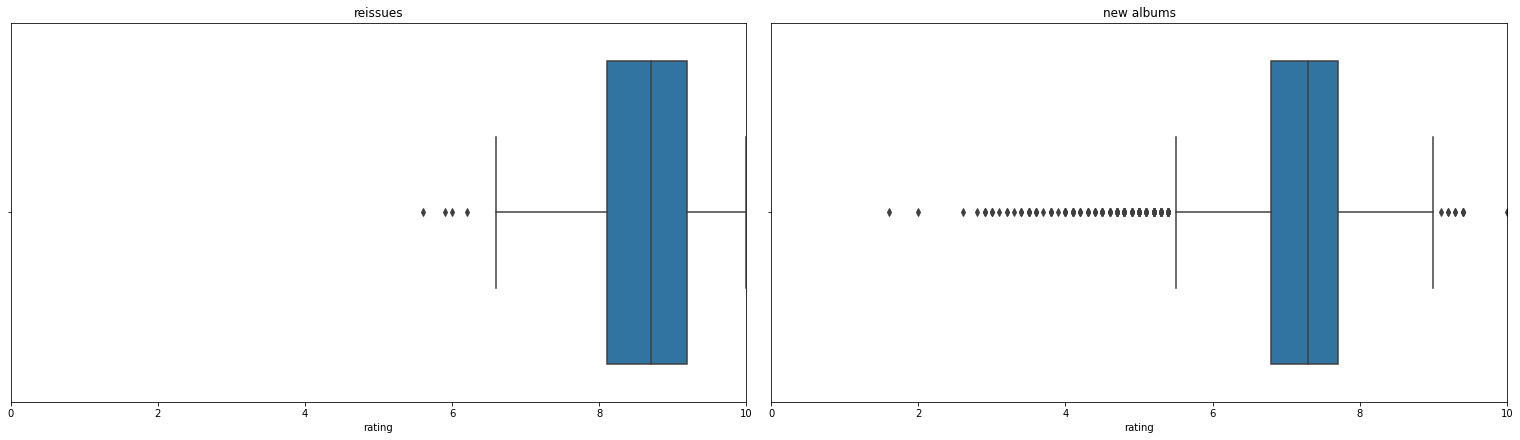

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(21, 6), layout='constrained')

# reissues
sns.boxplot(ax=axes[0], x=data_reissues.rating)
axes[0].title.set_text('reissues')

# new albums
sns.boxplot(ax=axes[1], x=data_new.rating)
axes[1].title.set_text('new albums')

for i in range(len(axes)):
    axes[i].set_xlim(0,10)

Both datasets have a similar standard deviation, although the mean rating as noted in findings is substantially higher amongst reissues than new albums. We see our new albums dataset now includes 5301 observations. We also see there are a lot of outliers in the ratings of new albums below 5.5. Let's take a look at the distribution of ratings over time to see if there are any noticeable trends to observe.

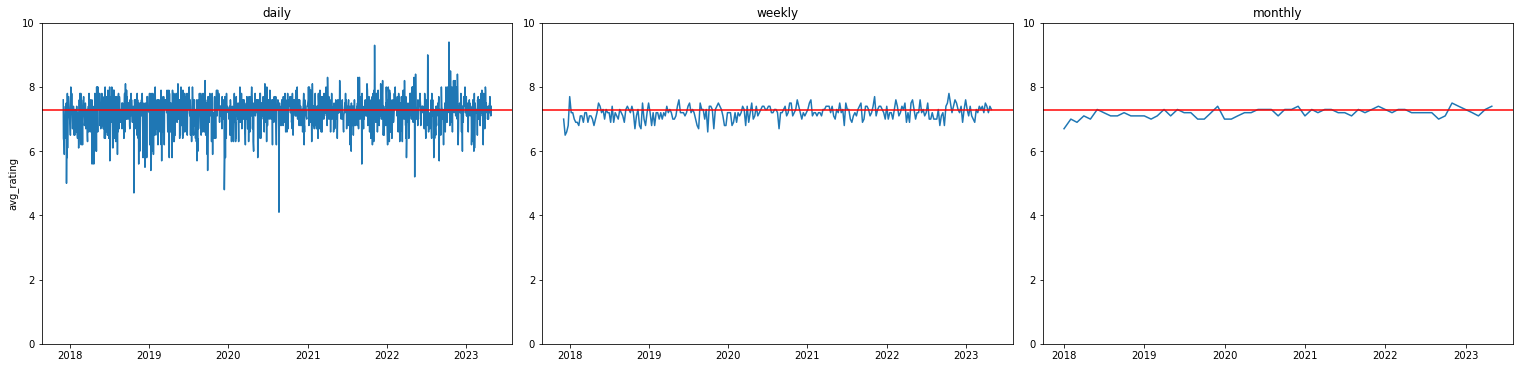

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(21, 5), layout='constrained')

# daily
sns.lineplot(ax=axes[0], data=daily_ratings, x='published', y='avg_rating')
axes[0].title.set_text('daily')

# weekly
sns.lineplot(ax=axes[1], data=weekly_ratings, x='published', y='avg_rating')
axes[1].title.set_text('weekly')

# monthly
sns.lineplot(ax=axes[2], data=monthly_ratings, x='published', y='avg_rating')
axes[2].title.set_text('monthly')

ylab = ['avg_rating','','']

for i in range(len(axes)):
    axes[i].set_xlabel('')
    axes[i].set_ylabel(ylab[i])
    axes[i].set_ylim(0,10)
    axes[i].axhline(y=np.mean(data.rating), color='r');

plt.show();

Here, ratings are grouped into three buckets: average rating by day, week, and month. The red represents the mean rating. We can observe that the ratings tend fluctuate highest by day, and even out over time. Nevertheless, we can observe on a monthly basis, average ratings were very low at the end of 2017/beginning of 2018, and fluctuated from low to high in the 4th quarter of 2022. The daily ratings give us a another sense of how the lower scores may be influencing the overall ratings. 

In [11]:
data_new.describe(include="all")

,artist,album,genre,label,releaseYear,writer,published,bestNewMusic,bestNewReissue,rating,review,url
count,5301,5301,5301,5301,5301,5301,5301,5301,5301,5301.000000,5301,5301
unique,3687,5248,91,1964,7,343,1581,2,1,NaN,5301,5301
top,Various Artists,DJ-Kicks,Rock,self-released,2018,Philip Sherburne,2019-04-11,False,False,NaN,"’s ninth album, First Two Pages of Frankenstei...",https://pitchfork.com/reviews/albums/the-natio...
freq,13,8,1567,175,1072,244,6,5068,5301,NaN,1,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.182079,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.824410,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.800000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.300000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,NaN


#### Writers  

Let's take a look at writers, the number of reviews per writer, and the distribution of average ratings amongst those writers.

In [12]:
writers_df.describe()

,total_reviews,avg_rating,genres,pct_total
count,343.000000,343.000000,343.000000,343.000000
mean,15.454810,7.227959,3.886297,0.002924
std,26.458897,0.475075,3.529560,0.004987
min,1.000000,5.400000,1.000000,0.000200
25%,2.000000,6.995000,1.000000,0.000400
50%,5.000000,7.220000,3.000000,0.000900
75%,16.000000,7.500000,5.000000,0.003000
max,244.000000,9.300000,23.000000,0.046000


343 writers have written reviews over this time frame, the average writer has written 15 reviews, but we can see the median number of reviews is 5.

In [13]:
writers_df.sort_values(by='total_reviews', ascending=False).round(5).head(10)

,writer,total_reviews,avg_rating,genres,pct_total
0,Philip Sherburne,244,7.53,18,0.0460
1,Ian Cohen,146,6.97,10,0.0275
2,Stuart Berman,131,7.48,14,0.0247
3,Ben Cardew,123,7.10,23,0.0232
4,Alphonse Pierre,121,6.59,4,0.0228
5,Evan Rytlewski,114,6.75,14,0.0215
6,Sheldon Pearce,112,7.03,9,0.0211
7,Andy Beta,104,7.25,16,0.0196
8,Sam Sodomsky,101,7.60,7,0.0191
9,Grayson Haver Currin,99,7.40,19,0.0187


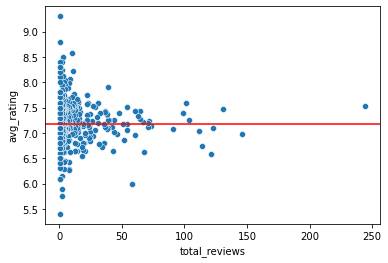

In [14]:
sns.scatterplot(data=writers_df, x='total_reviews', y='avg_rating')
plt.axhline(y=np.mean(data_new.rating), color='r');

We can see that as a writer writes more reviews, the average rating gets closer to the mean. This is due more to the likelihood that a low rating amongst fewer reviews will be more influential than for writers with more reviews under their belt. 

Total writers with one review: 81


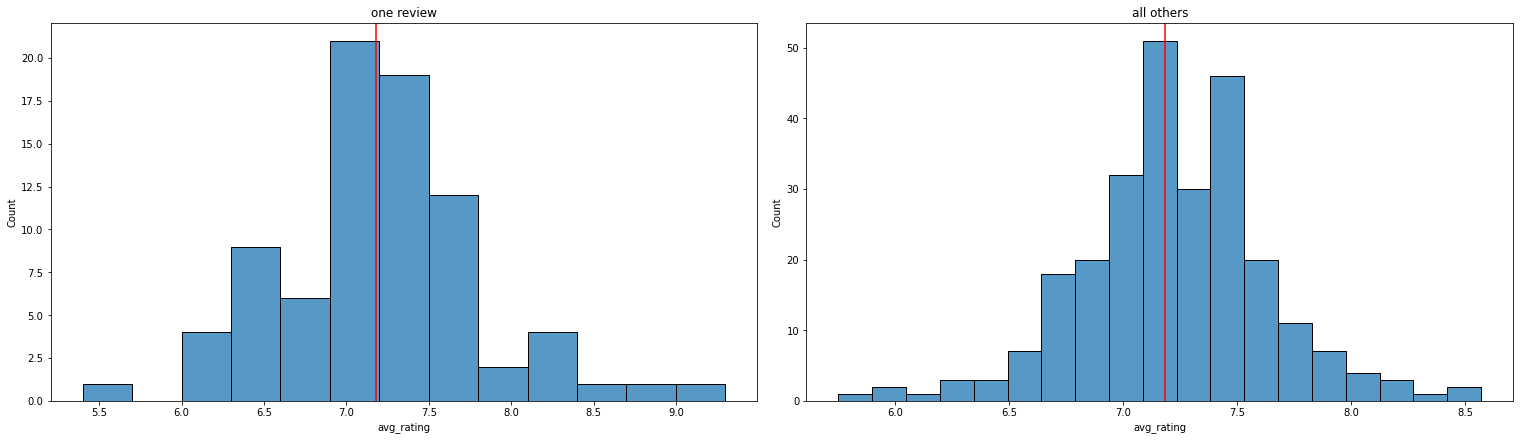

In [15]:
# writers with one review vs all other writers 
fig, axes = plt.subplots(1, 2, figsize=(21, 6), layout='constrained')

# writers with one review
sns.histplot(ax=axes[0], data=writers_df[writers_df['total_reviews'] == 1], x='avg_rating')
axes[0].axvline(data_new.rating.mean(), c='r', lw=1.5)
axes[0].title.set_text('one review')

# all other writers                    
sns.histplot(ax=axes[1], data=writers_df[writers_df['total_reviews'] != 1], x='avg_rating')
axes[1].axvline(data_new.rating.mean(), c='r', lw=1.5)
axes[1].title.set_text('all others')
                     
print('Total writers with one review: {}'.format(writers_df[writers_df['total_reviews'] == 1].writer.nunique()))

We can see that the distribution of ratings for writers with one review tends to skew towards lower ratings.

#### Labels 

Let's take a look at the labels.

Total Labels: 1964
Total Genres: 91


/Users/joshiden/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



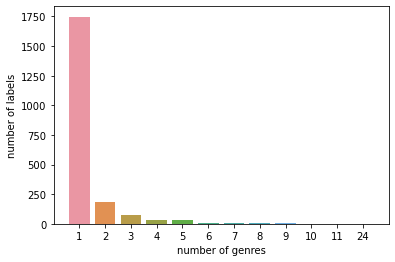

In [16]:
print("Total Labels: {}".format(labels_df.label.nunique()))
print("Total Genres: {}".format(data_new.genre.nunique()))

x = labels_genre.label.value_counts().reset_index().label
sns.countplot(x)
plt.xlabel('number of genres')
plt.ylabel('number of labels')
plt.title('number of genres per label')
plt.plot();

In [17]:
print('Total number of labels with one genre: {}'.format(labels_df[labels_df['total_genres'] == 1].label.count()))

Total number of labels with one genre: 1613


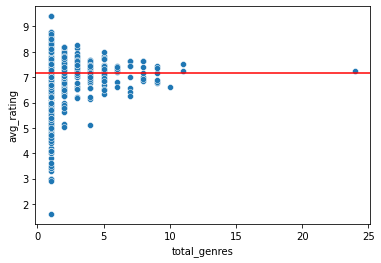

In [18]:
sns.scatterplot(data=labels_df, x='total_genres', y='avg_rating')
plt.axhline(y=np.mean(data_new.rating), color='r');

It appears that the more genres a label is releasing records in, the closer the average rating is to the mean. 

***
### Sentiment Analysis <a name="sentiment"></a>  

In this section, I take two approaches to try gain better insight into the contents of the reviews and how they may relate to Pitchfork ratings using the VADER algorithm and a lexical analysis.

#### VADER Sentiment Analysis <a name="vader"></a> 

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool  included in the Natural Language Toolkit (NLTK) library in Python. VADER uses a lexicon (a list of words and their associated sentiment scores) to analyze the sentiment of a given text. The lexicon contains over 7,500 words and their associated positive or negative sentiment scores, as well as intensity modifiers that adjust the strength of the sentiment.

VADER outputs sentiment scores for the text on four dimensions: positive, negative, neutral, and compound. The positive, negative, and neutral scores represent the proportion of words in the text that are classified as positive, negative, or neutral. The compound score is a single number between -1 and 1 that represents the overall sentiment of the text, with -1 indicating extremely negative sentiment, 0 indicating neutral sentiment, and 1 indicating extremely positive sentiment.

The downside to the VADER algorithm is that it is designed specifically for analyzing sentiment in social media texts. However, we apply to the reviews by splitting the text of the reviews into individual sentences and combining each sentence score. 

We start by defining a function to convert each score to a sentiment category.

In [19]:
# function to rank each review
def rank(score):
    '''provides a ranking based on a score'''
    if score <= -.32:
        return "very negative"
    if score <= -0.0:
        return "negative"
    if score <= .16:
        return "average"
    if score <= .32:
        return "positive"
    if score <= 1:
        return "very positive"

Next, we instantiate the `SentimentIntensityAnalyzer` object, and define a function to read through the reviews and assign scores and sentiments using the rank function we defined above. 

In [20]:
sia = SentimentIntensityAnalyzer()

def sentence_score(reviews):
    '''compiles an aggregate score based on the sentences of a review'''
    sentence_scores = []
    sentence_sentiment = []
    review_length = []

    for review in reviews:
        scores = [sia.polarity_scores(sentence)["compound"] for sentence in nltk.sent_tokenize(review)]
        scores = round(np.mean(scores),3)  
        sentence_scores.append(scores)
        sentiment = rank(scores)
        sentence_sentiment.append(sentiment)
        
        no_punc = re.sub(r'[^\w\s]', ' ', review).replace('  ', ' ')
        words = nltk.word_tokenize(no_punc)
        review_length.append(len(words))
        
    return review_length, sentence_scores, sentence_sentiment

data_new['review_length'], data_new['score'], data_new['sentiment'] = sentence_score(data_new.review)

%time

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs


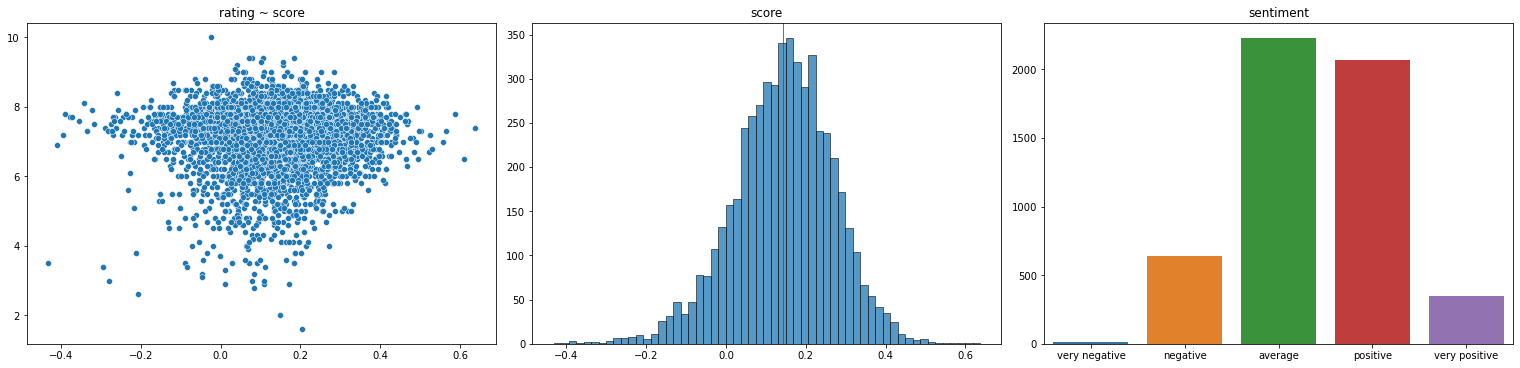

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(21, 5), layout='constrained')

# rating
sns.scatterplot(ax=axes[0], data=data_new, x='score', y='rating')
axes[0].title.set_text('rating ~ score')

# score
sns.histplot(ax=axes[1], x=data_new.score)
axes[1].axvline(data_new.score.mean(), c='r', lw=0.8)
axes[1].title.set_text('score')

# sentiment
sns.countplot(ax=axes[2], x=data_new.sentiment, order=['very negative','negative','average','positive','very positive'])
axes[2].title.set_text('sentiment')

ylab = ['','','']

for i in range(len(axes)):
    axes[i].set_xlabel('')
    axes[i].set_ylabel(ylab[i]);

We see a few things here:

* The scatter plot indicates there is no perceivable relationship between sentiment score and rating
* As we can see in the second figure above, most of the sentiment scores are above 0. 
* Most ratings are on the average- to- positive side of sentiments.   

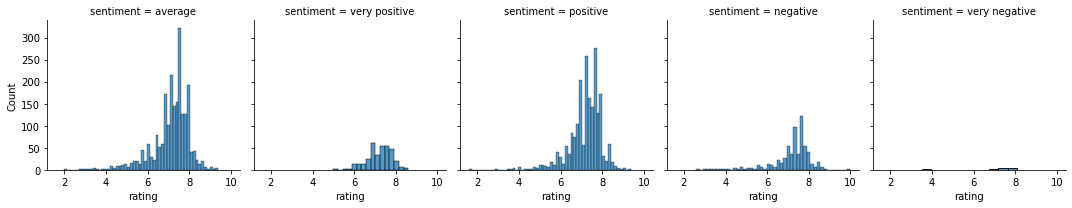

In [22]:
p = sns.FacetGrid(data_new, col="sentiment", height=3, aspect=1)
p.map(sns.histplot, "rating");

We can see that the distribution of ratings amongst the different sentiment categories are still centered around the mean of 7.2, and indeed this is the case.

In [23]:
print(tabulate(data_new.groupby('sentiment')['rating'].mean().round(2).reset_index().sort_values(by='rating', ascending=False), headers=['sentiment','average rating'], tablefmt="github", showindex=False, numalign="right"))

| sentiment     |   average rating |
|---------------|------------------|
| positive      |             7.21 |
| very positive |              7.2 |
| negative      |             7.19 |
| very negative |             7.17 |
| average       |             7.15 |


In this case I include the average rating rounded to two decimal places so you can see that there is slight variation in the average ratings, and that the lowest average rating is amongst the "average" sentiment. 

#### Lexical Analysis <a name="lexical"></a>   

As sentiment analysis using the VADER algorithm failed to yield results that could connect a relationship between sentiment and Pitchfork, I next sought to take a look at which words appeared most frequently in different categories of reviews to determine if a lexical approach might yield quantifiable metrics that could be connected with ratings. To do this, I took the following steps:

* Create a corpus using the entire review text 
* Remove stopwords such as "if", "and", "but"
* Lemmatize all words to their roots
* Remove the 100 most frequently used words 

The goal here was to identify if there were any clear distinctions of words that are used more frequently amongst albums that received higher or lower Pitchfork ratings. 

First, I created a couple functions to deal with the review text.

In [24]:
# create a corpus of reviews
def create_corpus(dfcolumn):
    '''takes a dataframe and returns a single string of its contents'''
    corpus = ''
    for row in dfcolumn:
        corpus += row.lower()
        
    return corpus        

# define a function to look through the corpus and return a frequency distribution object
def review_words(column, dropwords=[]):
    '''takes a dataframe column and an optional list of dropwords and returns a frequency distribution object of its words'''
    corpus = create_corpus(column)
    # tokenize the words
    words = nltk.word_tokenize(corpus)
    
    # retain only alphanumeric words
    words = [w for w in words if w.isalpha()]

    # remove stopwords 
    stopwords = nltk.corpus.stopwords.words("english")
    words = [w for w in words if w.lower() not in stopwords]
    
    # Lemmatizing words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # remove dropwords
    words = [word for word in words if word not in dropwords]

    # create frequency distribution 
    fd = nltk.FreqDist(words)
    
    return fd

Now I look at the entire corpus and split the frequency distributions up into groups of 25 for better visualizion.

In [25]:
fd = review_words(data_new.review)

In [26]:
top25 = pd.DataFrame(fd.most_common(25), columns=['word','count'])
top50 = pd.DataFrame(fd.most_common()[25:50], columns=['word','count'])
top75 = pd.DataFrame(fd.most_common()[50:75], columns=['word','count'])
top100 = pd.DataFrame(fd.most_common()[75:100], columns=['word','count'])

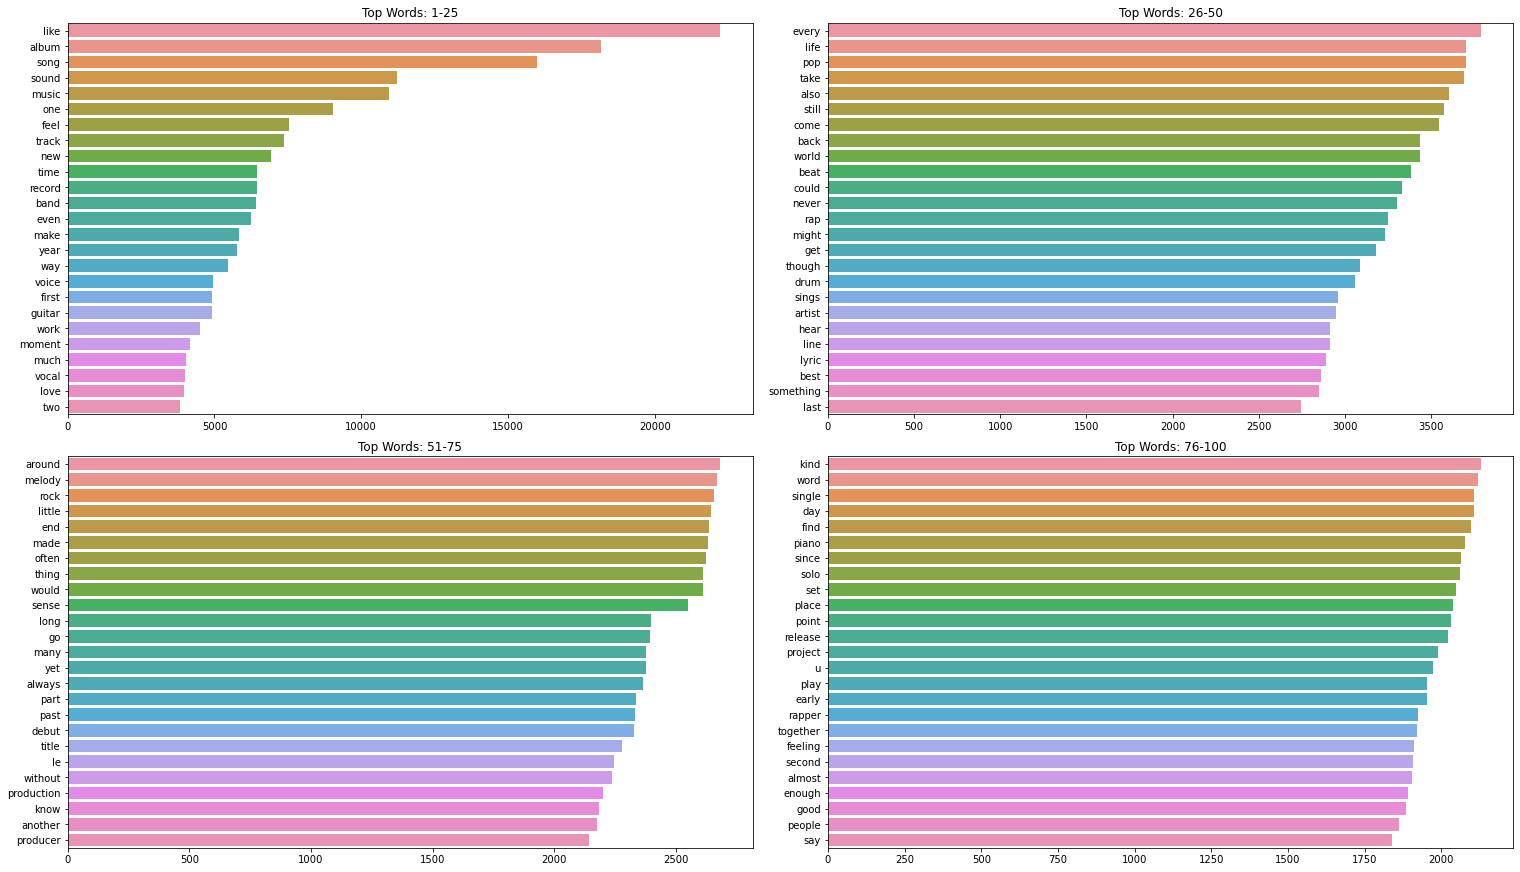

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(21, 12), layout='constrained')

# 1-25
sns.barplot(ax=axes[0,0], data=top25, y='word',x='count')
axes[0,0].title.set_text('Top Words: 1-25')

# 25-50
sns.barplot(ax=axes[0,1], data=top50, y='word',x='count')
axes[0,1].title.set_text('Top Words: 26-50')

# 50-75
sns.barplot(ax=axes[1,0], data=top75, y='word',x='count')
axes[1,0].title.set_text('Top Words: 51-75')

# 75-100
sns.barplot(ax=axes[1,1], data=top100, y='word',x='count')
axes[1,1].title.set_text('Top Words: 76-100')

ax_ct = [(0,0),(0,1),(1,0),(1,1)]
for i in ax_ct:
    axes[i].set_xlabel('')
    axes[i].set_ylabel('');

As we can see, there's a lot of replacable words that don't tell you much of anything related to music. Let's grab some of the musical words to keep from this list and remove the rest. 

In [28]:
print(list(dict(fd.most_common(100)).keys()))

['like', 'album', 'song', 'sound', 'music', 'one', 'feel', 'track', 'new', 'time', 'record', 'band', 'even', 'make', 'year', 'way', 'voice', 'first', 'guitar', 'work', 'moment', 'much', 'vocal', 'love', 'two', 'every', 'life', 'pop', 'take', 'also', 'still', 'come', 'back', 'world', 'beat', 'could', 'never', 'rap', 'might', 'get', 'though', 'drum', 'sings', 'artist', 'hear', 'line', 'lyric', 'best', 'something', 'last', 'around', 'melody', 'rock', 'little', 'end', 'made', 'often', 'thing', 'would', 'sense', 'long', 'go', 'many', 'yet', 'always', 'part', 'past', 'debut', 'title', 'le', 'without', 'production', 'know', 'another', 'producer', 'kind', 'word', 'single', 'day', 'find', 'piano', 'since', 'solo', 'set', 'place', 'point', 'release', 'project', 'u', 'play', 'early', 'rapper', 'together', 'feeling', 'second', 'almost', 'enough', 'good', 'people', 'say']


In [29]:
# create list of words to drop
words_to_keep = ['sound','feel','voice','moment','vocal','love','life','pop','take','beat','rap','hear','lyric',
                'best','melody','rock','sense','debut','production','producer','piano','solo','rapper','feeling','good']

dropwords = [word for word, count in fd.most_common(100) if word not in words_to_keep]
len(dropwords)

75

Now we reproduce the frequency distribution without the 75 most frequent words we've discarded, and observe the distribution of words by ratings group.

#### Word Frequency By Rating

In [30]:
# reviews by rating
review_8s = review_words(data_new[data_new['rating'] >= 8.0].review, dropwords)
review_7s = review_words(data_new[(data_new['rating'] >= 7.0) & (data_new['rating'] < 8.0)].review, dropwords)
review_6s = review_words(data_new[(data_new['rating'] >= 6.0) & (data_new['rating'] < 7.0)].review, dropwords)
review_5s = review_words(data_new[data_new['rating'] < 6.0].review, dropwords)

# top words by rating
word_8s = pd.DataFrame(review_8s.most_common(25), columns=['word','count'])
word_7s = pd.DataFrame(review_7s.most_common(25), columns=['word','count'])
word_6s = pd.DataFrame(review_6s.most_common(25), columns=['word','count'])
word_5s = pd.DataFrame(review_5s.most_common(25), columns=['word','count'])

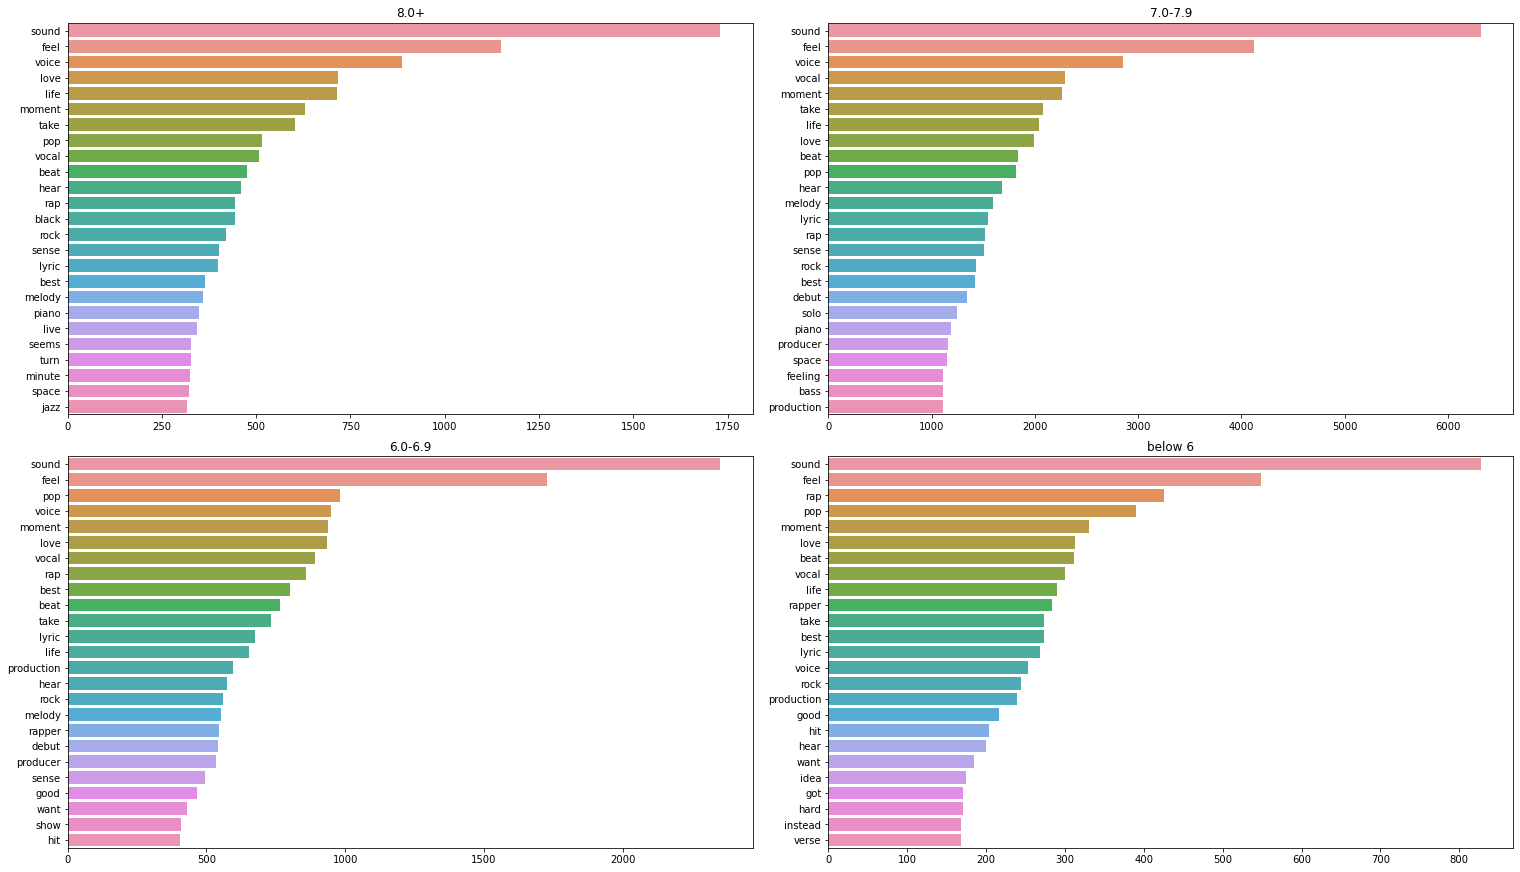

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(21, 12), layout='constrained')

# 8s
sns.barplot(ax=axes[0,0], data=word_8s, y='word',x='count')
axes[0,0].title.set_text('8.0+')

# 7s
sns.barplot(ax=axes[0,1], data=word_7s, y='word',x='count')
axes[0,1].title.set_text('7.0-7.9')

# 6s
sns.barplot(ax=axes[1,0], data=word_6s, y='word',x='count')
axes[1,0].title.set_text('6.0-6.9')

# below 6
sns.barplot(ax=axes[1,1], data=word_5s, y='word',x='count')
axes[1,1].title.set_text('below 6')

ax_ct = [(0,0),(0,1),(1,0),(1,1)]
for i in ax_ct:
    axes[i].set_xlabel('')
    axes[i].set_ylabel('');

The only interesting observation I glean from this data is one word that is frequently used in reviews for albums of every group that receive below an 8 but is **not** amongst the most-frequent words for albums that receive an 8 or higher: production. However, every other category appears to similar words, making it challenging to quantify a distinction between categories. It does appear that there are many repeating words. Let's take a look at the most frequenly occurring trigrams to see if there are any distinctions to glean. 

In [32]:
def trigram_extractor(column):
    '''takes a dataframe column and returns a frequency distribution object of its words'''
    corpus = create_corpus(column)
    # tokenize the words
    words = nltk.word_tokenize(corpus)
    
    # retain only alphanumeric words
    words = [w for w in words if w.isalpha()]

    # remove stopwords 
    stopwords = nltk.corpus.stopwords.words("english")
    words = [w for w in words if w.lower() not in stopwords]
    
    # collect trigrams 
    finder = nltk.collocations.TrigramCollocationFinder.from_words(words)
    
    return finder

In [33]:
t_grams = trigram_extractor(data_new.review)

In [34]:
# 20 most common trigrams
print(tabulate(t_grams.ngram_fd.most_common(20), headers=['trigram','count']))

trigram                            count
-------------------------------  -------
('catch', 'every', 'saturday')      1429
('every', 'saturday', 'albums')     1429
('saturday', 'albums', 'week')      1429
('albums', 'week', 'sign')          1429
('week', 'sign', 'hear')            1429
('sign', 'hear', 'newsletter')      1429
('buy', 'catch', 'every')            707
('rock', 'n', 'roll')                206
('new', 'york', 'city')              130
('drum', 'n', 'bass')                125
('songs', 'feel', 'like')             55
('often', 'feels', 'like')            49
('album', 'feels', 'like')            49
('might', 'sound', 'like')            49
('first', 'two', 'albums')            48
('nearly', 'every', 'song')           47
('feels', 'less', 'like')             46
('sounds', 'like', 'could')           44
('two', 'years', 'later')             42
('album', 'title', 'track')           39


If we removed the top 7 trigrams (the variations of "catch every saturday"), there actually aren't a ton of frequently occurring trigrams considering we're looking at 5300 reviews. 

### Network Analysis <a name="network"></a>

In this section, we perform network analysis on two sets of variables in the dataset to try to establish a relationship between the `writer` and `genre` variables, and the `label` and `genre` variables. 

The idea here is that the more genres a writers or record labels engage with, the more connected they will be amongst the entire network of pitchfork writers.

#### Writers Analysis <a name="writers"></a>  

First I construct a dataframe with each observation consisting of a writer, a genre, and the number of times the writer covers the genre:

In [38]:
writer_genre = pd.DataFrame(pd.Series(data_new.groupby(['writer', 'genre']).size(), name="count")).reset_index()
writer_genre.head()

,writer,genre,count
0,Abby Jones,Folk/Country,1
1,Abby Jones,Pop/R&B / Electronic,1
2,Abby Jones,Rock,34
3,Abigail Covington,Experimental,1
4,Abigail Covington,Folk/Country,1


Next I construct a bipartite graph object and add writers and genres as nodes. The edges are the interactions between writers and genres, and the count is added as a weight to represent the *number* of times the writer and genre interact. 

In [47]:
# list of unique writers
writers = list(writer_genre.writer.unique())
# list of unique genres
genres = list(writer_genre.genre.unique())

# instantiate Graph object
G = nx.Graph()

# add bipartite edges, 0: writer, 1: genre
G.add_nodes_from(writers, bipartite=0)
G.add_nodes_from(genres, bipartite=1)

# add edges
for index, row in writer_genre.iterrows():
    G.add_edge(row[0], row[1], weight=row[2])

In [48]:
# checking the graph is connected
nx.is_connected(G)

True

In [49]:
# checking graph is bipartite
nx.is_bipartite(G)

True

We can graph the entire network, but with 343 writers and 91 it's quite challenging to draw a legible bipartite graph,

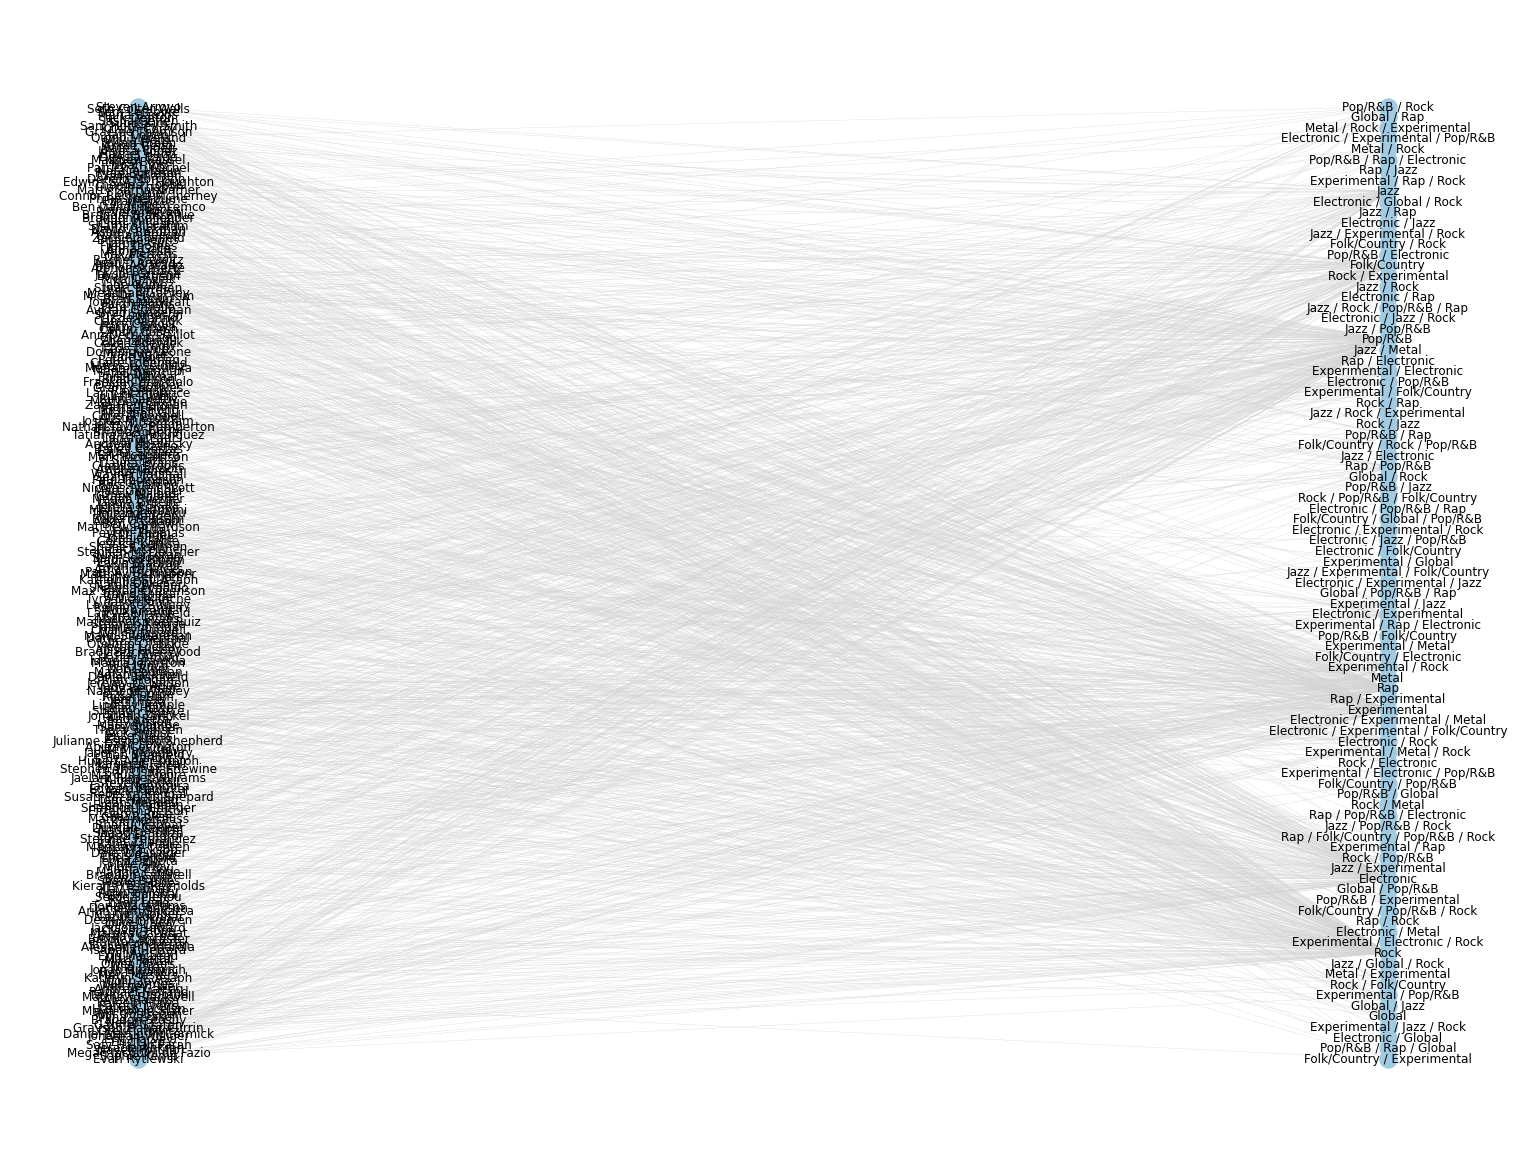

In [84]:
plt.figure(figsize=[21,16])

#colors = range(200)
options = {
    "node_color": "#A0CBE2",
    "edge_color": "lightgrey",
    "width": 0.3,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True,
}

top = nx.bipartite.sets(G)[0]
pos = nx.bipartite_layout(G, top)

nx.draw(G, pos, **options);

Besides, we're not really interested in visualizing the connections between writers and genres, we're interested in how writers are connected to each other. To visualize this, we project the bipartite graph. The `pyvis` library offers upgraded network analysis visualization integrated with networkx, so we can produce graphs like this right out of the box:

In [90]:
nt = Network('500px', '500px', cdn_resources='remote', notebook=True)
nt.from_nx(G)
display(nt.show('full_writers.html'));

full_writers.html


In [94]:
IFrame('full_writers.html', width=800, height=600)

***
### Appendix A: Web Scraping <a name="web-scraping"></a>

PLACEHOLDER 
***

***
### Appendix B: Data Tidying <a name="data-tidying"></a>

PLACEHOLDER 
***

In [93]:
# loading packages
import pandas as pd 
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize, word_tokenize, MWETokenizer
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramCollocationFinder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams, bigrams, trigrams
import networkx as nx
from networkx.algorithms import bipartite as bi
from pyvis.network import Network
from tabulate import tabulate
import re
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import IFrame
import time

pio.renderers.default = "svg"
%matplotlib inline

In [2]:
# loading the full dataset
data = pd.read_csv('data.csv').dropna()

# remove brackets and parenthesis from text
data['review'] = [re.sub('\(.*?\)|\[.*?\]','',x) for x in data['review']]
# remove asterisks
data['review'] = [re.sub("\*", " ", x) for x in data['review']]
# remove double parenthesesis
data['review'] = [x.replace('\\"', ' ') for x in data['review']]
# remove double backslashes
data['review'] = [re.sub("\\\\", ' ', x) for x in data['review']]
# white space after periods
data['review'] = [x.replace(".", '. '). replace(" .", ".").replace("  ", " ").replace("\"", '').replace(",,", ",").replace(" ,", ",") for x in data['review']]
# rename score column: rating 
data.rename(columns={'author':'writer','score':'rating'}, inplace=True)
# releaseYear column as string
data['releaseYear'] = [str(x).replace(".0", "") for x in data['releaseYear']]

In [3]:
## FILTERING OUT REISSUES AND NEW ALBUMS ##
# list of possible words denoting reissue
reissues = ['deluxe','reissue','anniversary', 'Anniversary)','edition']

# filter out reissue reviews - only new reviews
data_new = data[data['releaseYear'] >= '2017']
data_new = data_new[data_new['bestNewReissue'] != True]
data_new = data_new[~data_new['album'].str.lower().isin(reissues)]
data_new = data_new[data_new['artist'] != 'King Crimson']

# isolate the reissues
data_reissues = data[(data['releaseYear'] < '2017') | (data['album'].str.lower().isin(reissues)) | (data['artist'] == 'King Crimson')]

In [4]:
## EXPLORING RATINGS OVER TIME ##
# daily ratings
daily_ratings = data_new[['published','rating']]
daily_ratings['published'] = pd.to_datetime(daily_ratings['published'])
daily_ratings = daily_ratings.groupby('published')['rating'].mean().round(1).reset_index().rename(columns={'rating':'avg_rating'})

# weekly ratings
weekly_ratings = daily_ratings.groupby([pd.Grouper(key='published', freq='W')])['avg_rating'].mean().round(1).reset_index()

# monthly ratings
monthly_ratings = daily_ratings.groupby([pd.Grouper(key='published', freq='M')])['avg_rating'].mean().round(1).reset_index()

/var/folders/82/s2jpfjnx23x79yzgnlx3kx_h0000gp/T/ipykernel_7296/510172775.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [5]:
## WRITERS ## 
# total number of reviews
writers_reviews = data_new.writer.value_counts().reset_index().rename(columns={'index':'writer','writer':'total_reviews'})
# avg rating
writers_ratings = data_new.groupby('writer')['rating'].mean().round(2).reset_index().rename(columns={'index':'writer','rating':'avg_rating'})
# total number of genres 
writers_genres = data_new.groupby('writer')['genre'].nunique().reset_index().rename(columns={'genre':'genres'})
# combine datasets
writers_df = pd.merge(pd.merge(writers_reviews, writers_ratings, on='writer'), writers_genres, on='writer')
# percentage of total reviews
writers_df['pct_total'] = writers_df['total_reviews'].agg(lambda x: x/len(data_new)).round(4)

In [6]:
## LABELS ## 
# genres by label
labels_genre = pd.DataFrame(pd.Series(data.groupby(['label', 'genre']).size(), name="count")).reset_index()
# number of review by label
label_reviews = pd.Series(data_new.label.value_counts(ascending=False), name='total_reviews').reset_index().rename(columns={'index':'label'})
# average rating per label 
label_ratings = data_new.groupby('label')['rating'].mean().round(2).reset_index().rename(columns={'rating':'avg_rating',})
# total genres by label
total_genres = labels_genre.label.value_counts().reset_index().rename(columns={'index':'label','label':'total_genres'})
# master label
labels_df = pd.merge(pd.merge(label_reviews, total_genres, on='label'), label_ratings, on='label')
# labels with more than ten reviews
top_reviews = labels_df[labels_df['total_reviews'] >= 10].sort_values(by='avg_rating',ascending=False)
